In [225]:
'''
https://medium.com/@brandonkessler/how-to-calculate-lifetime-value-of-your-customers-with-python-113f59385d91

https://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset
'''

'\nhttps://medium.com/@brandonkessler/how-to-calculate-lifetime-value-of-your-customers-with-python-113f59385d91\n\nhttps://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset\n'

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Ensure you have XGBoost installed
from sklearn.metrics import mean_absolute_error, r2_score

In [227]:
df = pd.read_csv('digital_wallet_ltv_dataset.csv')
df.sample(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
5474,cust_5474,20,Rural,Middle,504,15948.020167,54072.966496,5158.817492,8.037802e+06,102,335,2665,21,4996.737958,Daily,Credit Card,2,40.165515,8,8.167118e+05
399,cust_0399,64,Urban,Low,569,17712.839941,44542.598442,3371.257027,1.007861e+07,89,177,4377,24,513.294068,Weekly,Wallet Balance,10,68.593651,8,1.026758e+06
841,cust_0841,20,Suburban,Low,638,5519.162736,8475.614597,1016.594337,3.521226e+06,171,126,2079,29,1543.646905,Daily,Wallet Balance,9,6.208650,5,3.634088e+05
2548,cust_2548,51,Rural,Middle,279,16015.541940,21800.852079,2117.937084,4.468336e+06,255,290,1421,32,3145.873576,Monthly,Debit Card,17,54.720212,1,4.523027e+05
5299,cust_5299,65,Urban,High,971,4693.656285,13956.978001,801.811494,4.557540e+06,329,56,2775,35,4371.833427,Weekly,UPI,6,4.312127,9,4.716181e+05


In [228]:
df.shape

(7000, 20)

In [229]:
df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [230]:
df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [232]:
def count_nulls_and_blanks(df):
    """
    Counts the number of null (NaN) and blank ("") values in a Pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.DataFrame: A DataFrame showing the count of nulls and blanks for each column.
    """
    null_counts = df.isna().sum()  # Count NaN values
    blank_counts = (df == "").sum()  # Count blank values
    result = pd.DataFrame({'Null Count': null_counts, 'Blank Count': blank_counts})
    return result


print("\nCount of Nulls and Blanks:")
print(count_nulls_and_blanks(df))



Count of Nulls and Blanks:
                             Null Count  Blank Count
Customer_ID                           0            0
Age                                   0            0
Location                              0            0
Income_Level                          0            0
Total_Transactions                    0            0
Avg_Transaction_Value                 0            0
Max_Transaction_Value                 0            0
Min_Transaction_Value                 0            0
Total_Spent                           0            0
Active_Days                           0            0
Last_Transaction_Days_Ago             0            0
Loyalty_Points_Earned                 0            0
Referral_Count                        0            0
Cashback_Received                     0            0
App_Usage_Frequency                   0            0
Preferred_Payment_Method              0            0
Support_Tickets_Raised                0            0
Issue_Resolution_T

In [233]:
# Check for duplicate Customer_ID values
duplicates = df[df.duplicated(subset='Customer_ID', keep=False)]

if duplicates.empty:
    print("No duplicate Customer_ID values found.")
else:
    print("Duplicate Customer_ID values found:")
    print(duplicates)


No duplicate Customer_ID values found.


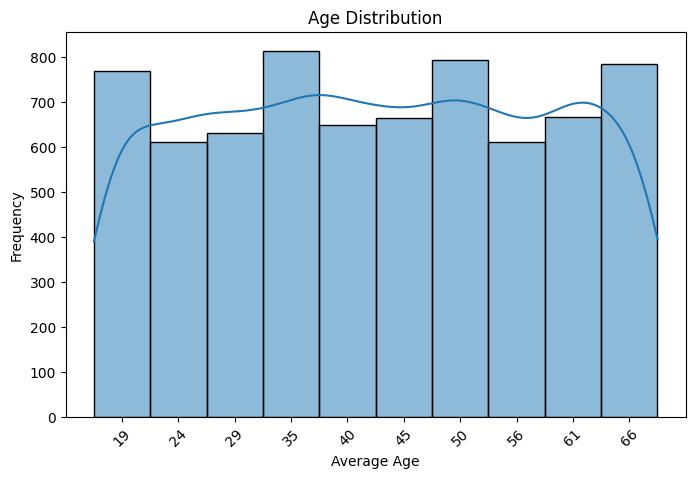

In [234]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Age'].min(), df['Age'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
rounded_bin_averages = [round(avg) for avg in bin_averages]  # Round to the nearest integer

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Age'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{avg}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

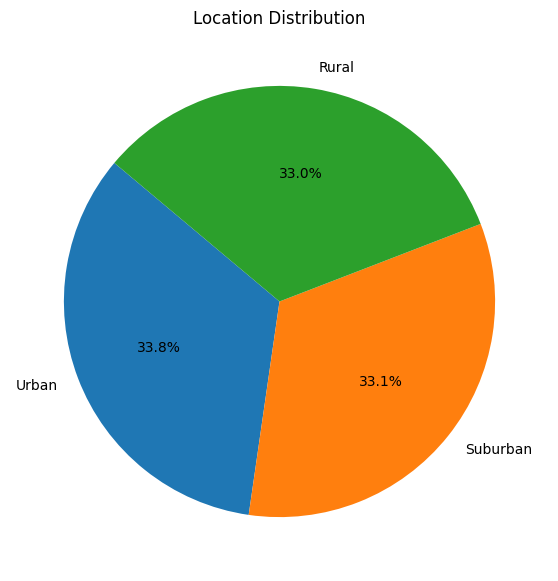

In [235]:
# Count occurrences of each location
location_counts = df['Location'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location Distribution')
plt.show()


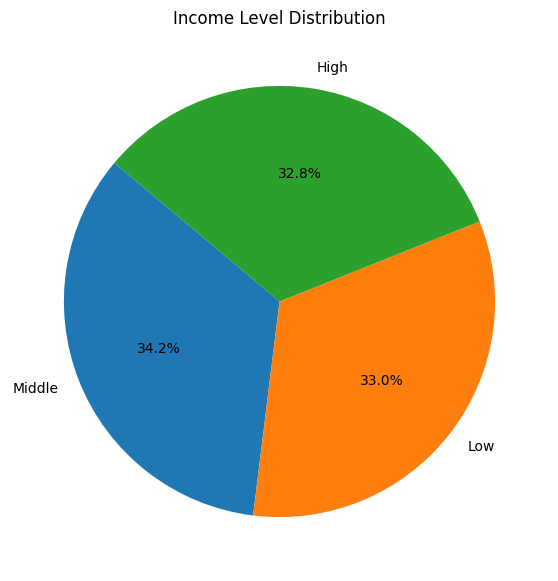

In [236]:
# Count occurrences of each income level
income_level_counts = df['Income_Level'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(income_level_counts, labels=income_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Level Distribution')
plt.show()

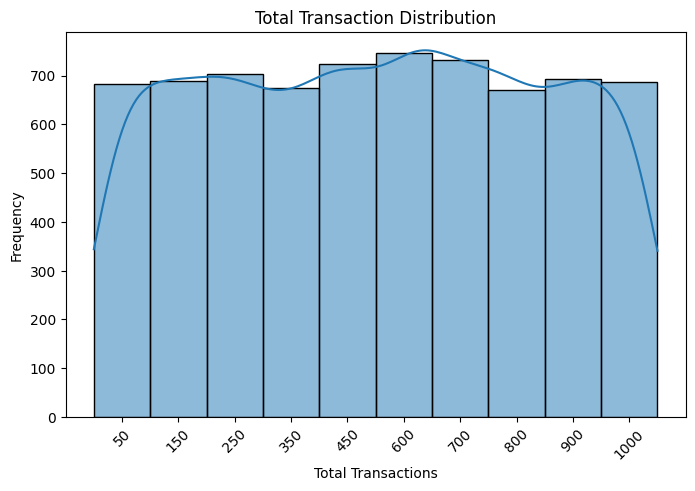

In [237]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Total_Transactions'].min(), df['Total_Transactions'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round to the nearest 10, 50, or 100
def round_custom(value):
    if value < 100:
        return round(value, -1)  # Round to nearest 10
    elif value < 500:
        return round(value, -1)  # Round to nearest 10 for mid-range values
    else:
        return round(value, -2)  # Round to nearest 100 for larger values

rounded_bin_averages = [round_custom(avg) for avg in bin_averages]

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Total_Transactions'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{int(avg)}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Total Transactions')
plt.ylabel('Frequency')
plt.title('Total Transaction Distribution')

plt.show()



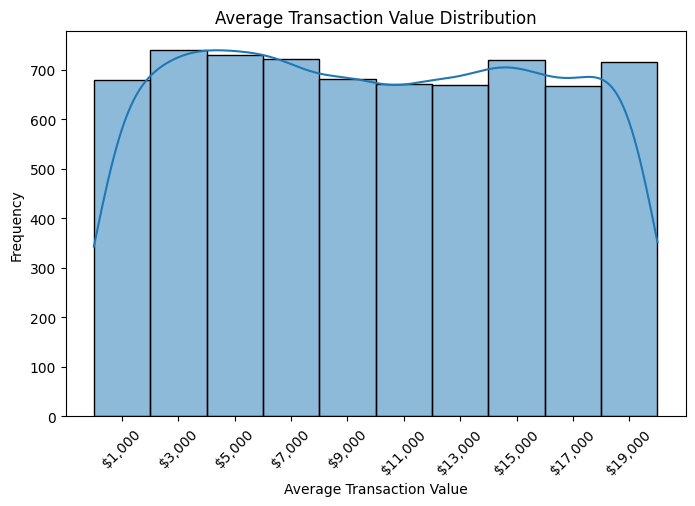

In [238]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Avg_Transaction_Value'].min(), df['Avg_Transaction_Value'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round to the nearest 1000
rounded_bin_averages = [round(avg, -3) for avg in bin_averages]  # Round to nearest 1000

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Avg_Transaction_Value'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.title('Average Transaction Value Distribution')

plt.show()

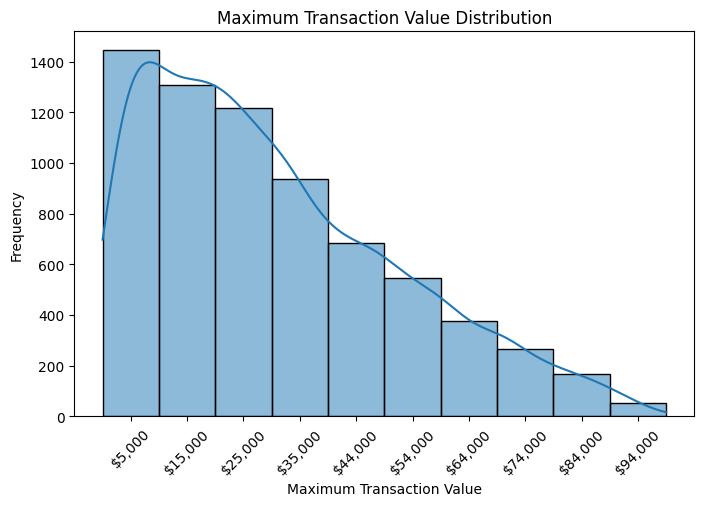

In [239]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Max_Transaction_Value'].min(), df['Max_Transaction_Value'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round each bin average to the nearest 1000
rounded_bin_averages = [round(avg, -3) for avg in bin_averages]  # Round to nearest 1000

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Max_Transaction_Value'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Maximum Transaction Value')
plt.ylabel('Frequency')
plt.title('Maximum Transaction Value Distribution')

plt.show()

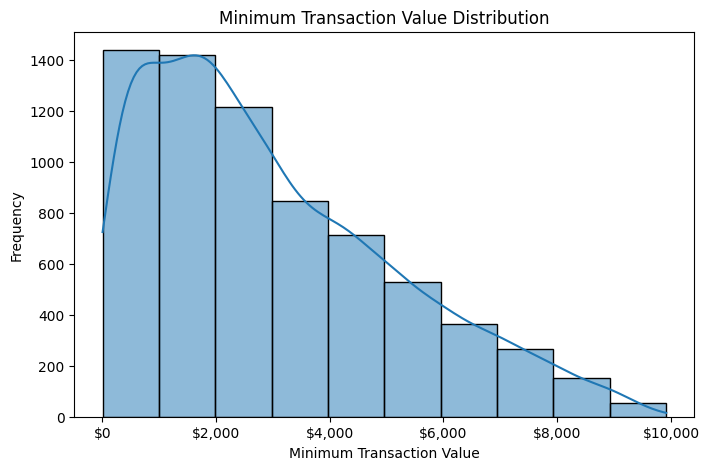

In [240]:
# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Min_Transaction_Value'], bins=10, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xlabel('Minimum Transaction Value')
plt.ylabel('Frequency')
plt.title('Minimum Transaction Value Distribution')
plt.show()

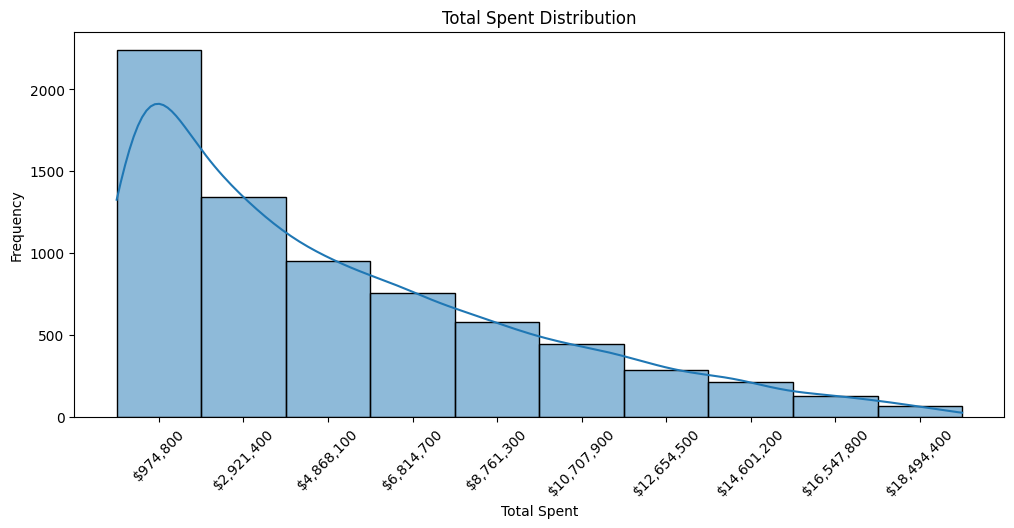

In [241]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Total_Spent'].min(), df['Total_Spent'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
rounded_bin_averages = [round(avg, -2) for avg in bin_averages]  # Round to nearest hundred

# Plot Seaborn Histogram
plt.figure(figsize=(12, 5))
ax = sns.histplot(df['Total_Spent'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Total Spent Distribution')

plt.show()


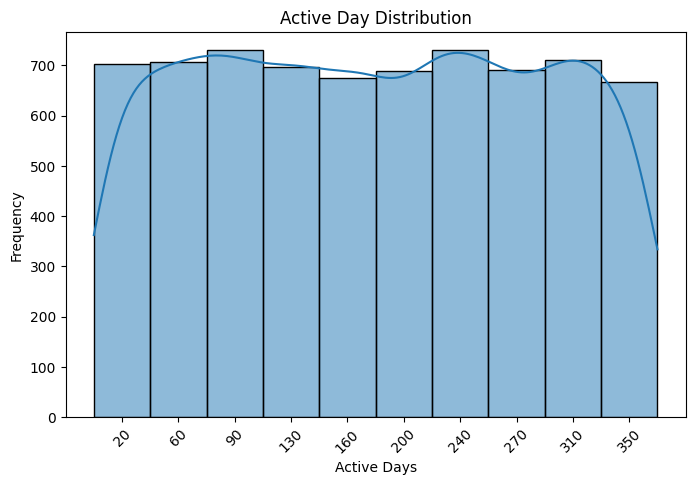

In [242]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Active_Days'].min(), df['Active_Days'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round each bin average to the nearest 10
rounded_bin_averages = [round(avg, -1) for avg in bin_averages]  # Round to nearest 10

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Active_Days'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{int(avg)}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Active Days')
plt.ylabel('Frequency')
plt.title('Active Day Distribution')

plt.show()

In [243]:
# Calculate the Annual Value and Average Transactions for each customer

# Calculate Annual Value Per Year
df["Annual_Value"] = df.apply(
    lambda row: (row["Total_Spent"] / row["Active_Days"]) * 365 if row["Active_Days"] > 0 else 0,
    axis=1
)

# Calculate Average Transactions Per Year
df["Avg_Transactions_Per_Year"] = df.apply(
    lambda row: (row["Total_Transactions"] / row["Active_Days"]) * 365 if row["Active_Days"] > 0 else 0,
    axis=1
)

df.sample(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,...,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Annual_Value,Avg_Transactions_Per_Year
316,cust_0316,31,Rural,High,19,6668.162846,7207.789571,2855.651498,1.266951e+05,190,...,31,2343.406673,Monthly,Wallet Balance,20,64.466702,6,2.688981e+04,2.433879e+05,36.500000
1072,cust_1072,37,Rural,Low,358,10802.818206,47381.604448,4750.818284,3.867409e+06,276,...,29,191.216952,Daily,Credit Card,9,58.376616,8,4.005233e+05,5.114508e+06,473.442029
1854,cust_1854,62,Urban,Middle,747,2776.716007,6385.985798,561.329065,2.074207e+06,276,...,50,1507.178191,Monthly,Wallet Balance,10,49.162963,2,2.207331e+05,2.743063e+06,987.880435
12,cust_0012,39,Rural,High,772,13358.322191,19570.911891,4999.855537,1.031262e+07,275,...,20,4806.148623,Monthly,UPI,2,48.822977,4,1.041983e+06,1.368767e+07,1024.654545
2300,cust_2300,29,Rural,Low,929,4937.446793,8206.252169,699.922267,4.586888e+06,228,...,39,3781.609437,Daily,Wallet Balance,0,56.575650,7,4.759940e+05,7.343044e+06,1487.214912


In [244]:
def calculate_ltv(df):
    """
    Calculates the Lifetime Value (LTV) for each customer in the given DataFrame.
    The LTV is estimated using:
    LTV = Estimated_Lifespan * Avg_Transactions_Per_Year * Avg_Transaction_Value
    """
    
    # Ensure no division by zero
    df["Avg_Transaction_Value"] = df.apply(
        lambda row: row["Total_Spent"] / row["Total_Transactions"] if row["Total_Transactions"] > 0 else 0,
        axis=1
    )
    
    # Convert Active Days into Estimated Lifespan (years)
    df["Estimated_Lifespan"] = df["Active_Days"] / 365

    # Calculate LTV
    df["LTV2"] = df["Estimated_Lifespan"] * df["Avg_Transactions_Per_Year"] * df["Avg_Transaction_Value"]

    return df

In [245]:
# Apply LTV Calculation
df = calculate_ltv(df)



In [246]:
df.sample(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,...,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Annual_Value,Avg_Transactions_Per_Year,Estimated_Lifespan,LTV2
17,cust_0017,18,Urban,Middle,594,19123.752021,87283.024002,6116.877761,1.135951e+07,310,...,Weekly,Debit Card,15,46.047659,5,1.154309e+06,1.337491e+07,699.387097,0.849315,1.135951e+07
1646,cust_1646,55,Urban,Middle,694,15194.261726,31953.805261,3923.197415,1.054482e+07,73,...,Daily,Wallet Balance,5,15.551028,2,1.064284e+06,5.272409e+07,3470.000000,0.200000,1.054482e+07
2979,cust_2979,44,Suburban,Low,499,19895.245150,90133.801858,7993.839845,9.927727e+06,51,...,Daily,Credit Card,0,26.222283,9,1.005090e+06,7.105138e+07,3571.274510,0.139726,9.927727e+06
3911,cust_3911,62,Suburban,High,131,201.524492,527.398742,59.544613,2.639971e+04,61,...,Daily,Wallet Balance,17,5.366540,2,7.049493e+03,1.579655e+05,783.852459,0.167123,2.639971e+04
6463,cust_6463,21,Urban,Middle,39,10543.039763,33582.654129,2674.911640,4.111786e+05,288,...,Monthly,Wallet Balance,3,65.954731,2,5.038177e+04,5.211117e+05,49.427083,0.789041,4.111786e+05


In [247]:
######################################################
#Try to Predict LTV values from customer features 
######################################################

In [248]:
#Encode Categorical Data

# Apply One-Hot Encoding to the 'Location' column
df = pd.get_dummies(df, columns=["Location"], prefix="Location", dtype='int')

# Apply One-Hot Encoding to the 'Income_Level' column
df = pd.get_dummies(df, columns=["Income_Level"], prefix="Income_Level", dtype='int')

# Apply One-Hot Encoding to the 'App_Usage_Frequency' column
df = pd.get_dummies(df, columns=["App_Usage_Frequency"], prefix="App_Usage_Frequency", dtype='int')

# Apply One-Hot Encoding to the 'Preferred_Payment_Method' column
df = pd.get_dummies(df, columns=["Preferred_Payment_Method"], prefix="Preferred_Payment_Method", dtype='int')

In [249]:
df.sample(5)

,Customer_ID,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,...,Income_Level_High,Income_Level_Low,Income_Level_Middle,App_Usage_Frequency_Daily,App_Usage_Frequency_Monthly,App_Usage_Frequency_Weekly,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_UPI,Preferred_Payment_Method_Wallet Balance
1345,cust_1345,36,243,4226.221957,18874.271817,782.632504,1.026972e+06,134,359,3942,...,0,0,1,1,0,0,0,0,1,0
3017,cust_3017,52,445,18881.892319,74902.125917,6155.201463,8.402442e+06,48,272,1437,...,0,0,1,0,0,1,1,0,0,0
6881,cust_6881,61,441,8924.710542,32067.567545,3527.139744,3.935797e+06,75,103,2560,...,0,1,0,0,0,1,0,0,1,0
5312,cust_5312,58,42,7749.842395,25518.043498,1948.049932,3.254934e+05,128,135,2114,...,1,0,0,1,0,0,0,0,0,1
3528,cust_3528,61,577,12633.206276,28306.473606,4430.665252,7.289360e+06,215,178,3710,...,0,1,0,0,1,0,0,1,0,0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Customer_ID                              7000 non-null   object 
 1   Age                                      7000 non-null   int64  
 2   Total_Transactions                       7000 non-null   int64  
 3   Avg_Transaction_Value                    7000 non-null   float64
 4   Max_Transaction_Value                    7000 non-null   float64
 5   Min_Transaction_Value                    7000 non-null   float64
 6   Total_Spent                              7000 non-null   float64
 7   Active_Days                              7000 non-null   int64  
 8   Last_Transaction_Days_Ago                7000 non-null   int64  
 9   Loyalty_Points_Earned                    7000 non-null   int64  
 10  Referral_Count                           7000 no

In [251]:
# Define the selected feature columns based on your list
feature_columns = [
    "Age", "Loyalty_Points_Earned", "Referral_Count", "Cashback_Received", 
    "Support_Tickets_Raised", "Issue_Resolution_Time", "Customer_Satisfaction_Score",
    "Location_Rural", "Location_Suburban", "Location_Urban",
    "Income_Level_Low", "Income_Level_Middle", "Income_Level_High",
    "App_Usage_Frequency_Daily", "App_Usage_Frequency_Monthly", "App_Usage_Frequency_Weekly",
    "Preferred_Payment_Method_Credit Card", "Preferred_Payment_Method_Debit Card",
    "Preferred_Payment_Method_UPI", "Preferred_Payment_Method_Wallet Balance"
]

# Ensure only the specified feature columns are used
X = df[feature_columns]
y = df[['LTV']]  # Target variables

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the training and testing sets as CSV files if needed
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)


In [252]:
# Split training data into train and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to try
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

# Dictionary to store performance
performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation set

    # Compute evaluation metrics
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)

    # Store performance
    performance[name] = {"R² Score": r2, "Mean Absolute Error": mae}

# Convert results to DataFrame and display
performance_df = pd.DataFrame(performance).T
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=performance_df)


c:\Users\urife\OneDrive\Desktop\Projects\LTV\LTV\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\urife\OneDrive\Desktop\Projects\LTV\LTV\venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\urife\OneDrive\Desktop\Projects\LTV\LTV\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [253]:
print(performance_df)

                          R² Score  Mean Absolute Error
Linear Regression        -0.001213        360640.834524
Random Forest            -0.040362        372589.515521
Gradient Boosting        -0.026380        365413.082988
Support Vector Regressor -0.059693        344795.168446
XGBoost                  -0.217201        390406.531250


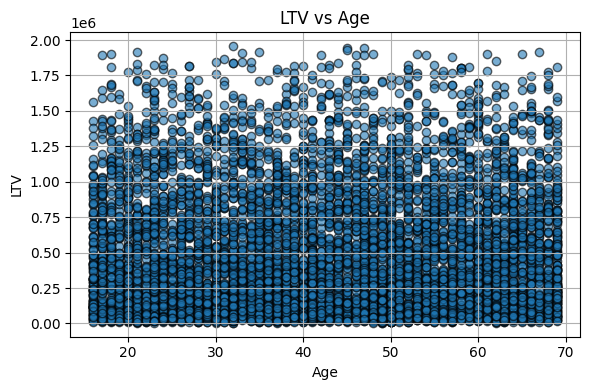

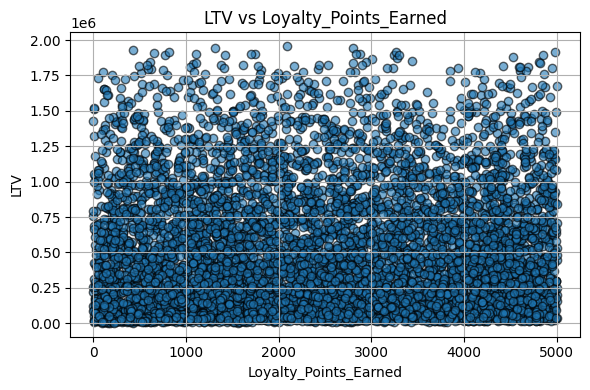

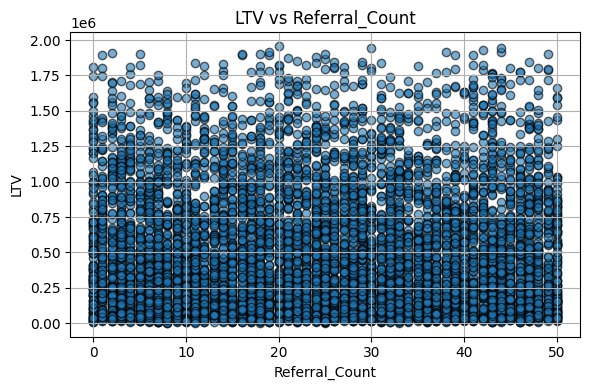

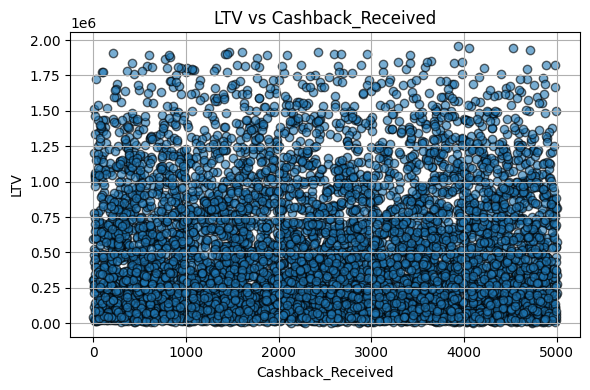

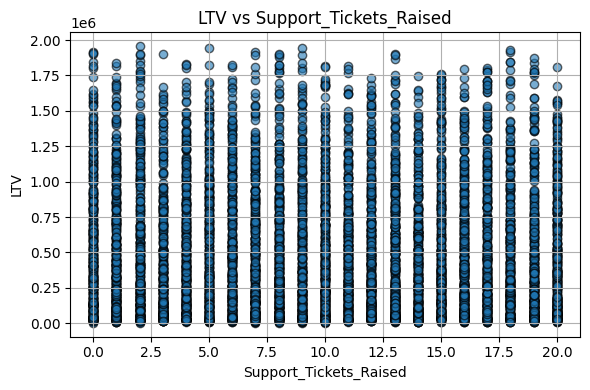

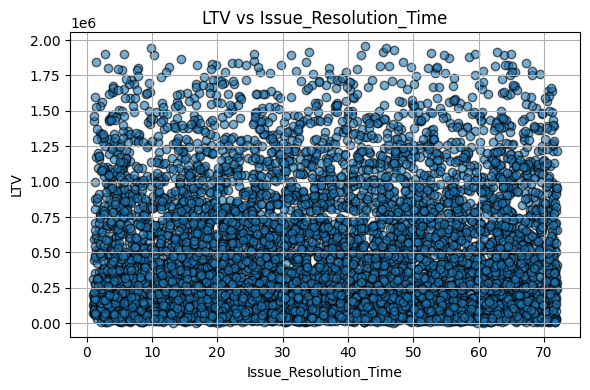

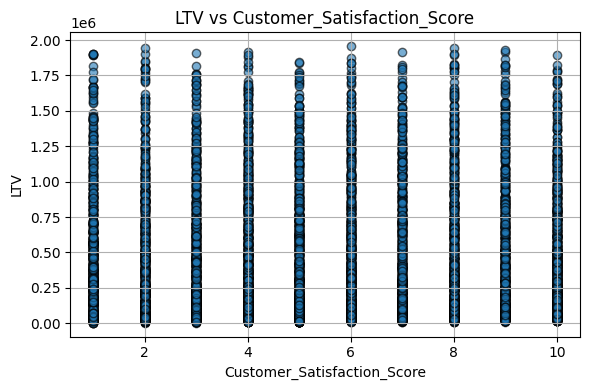

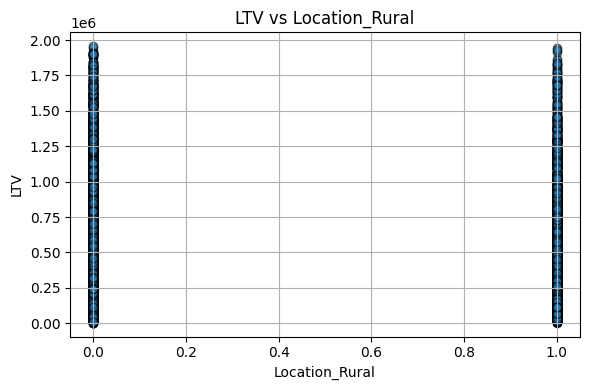

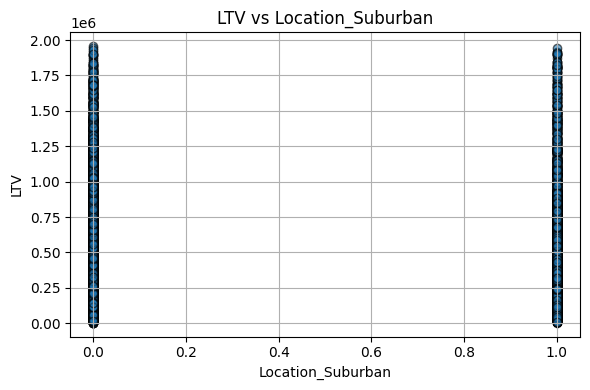

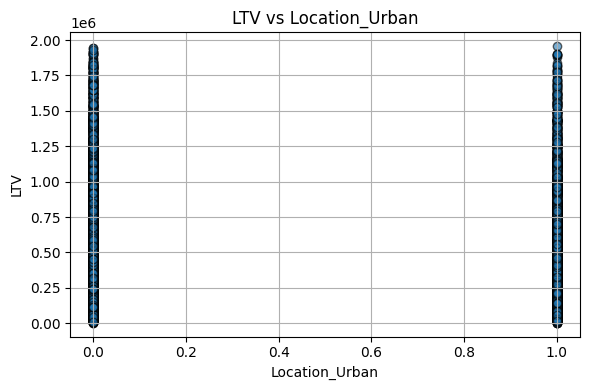

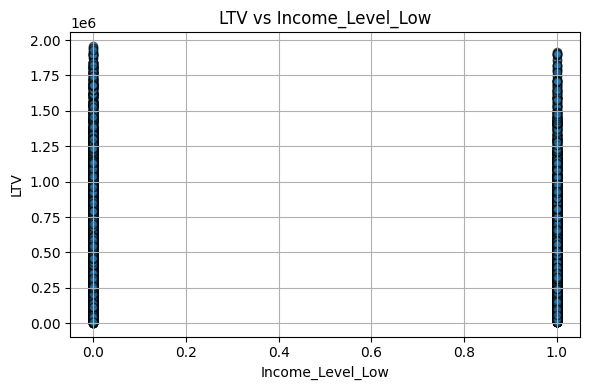

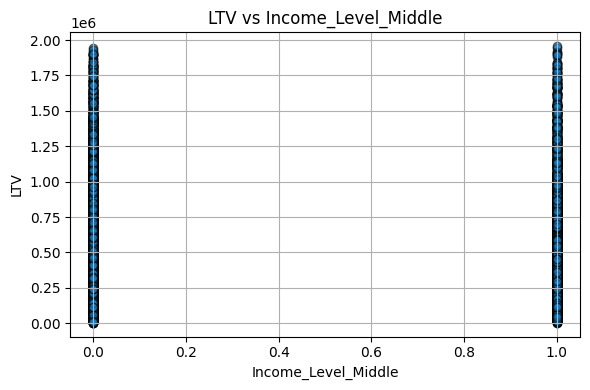

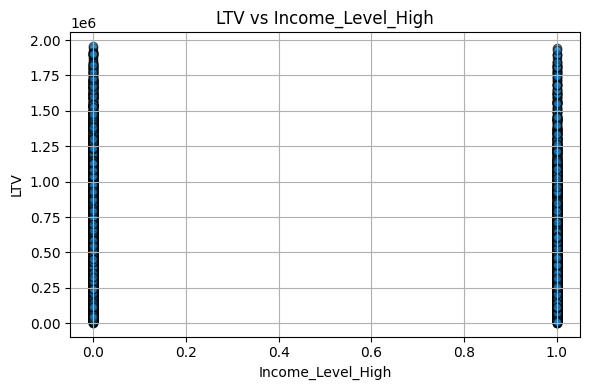

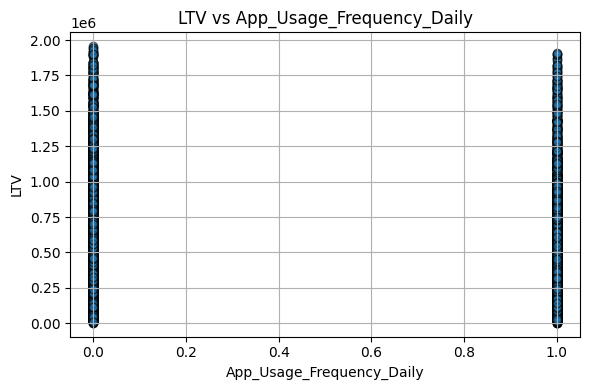

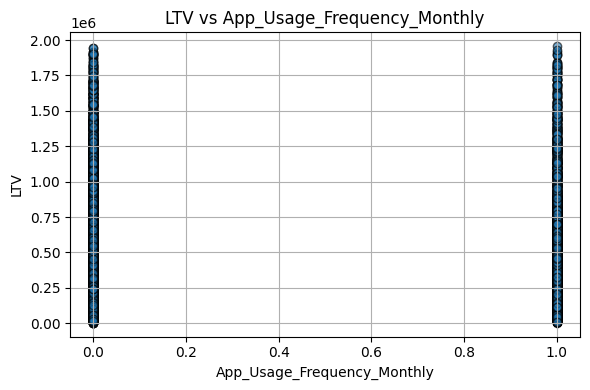

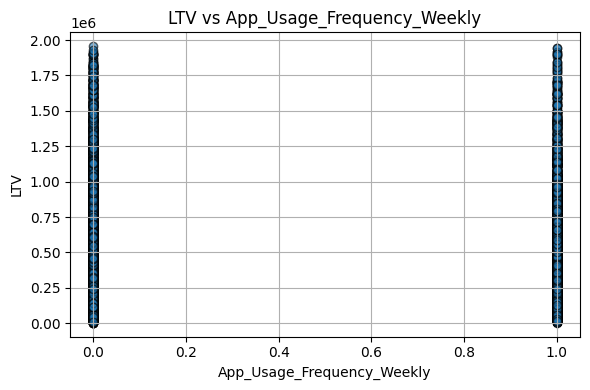

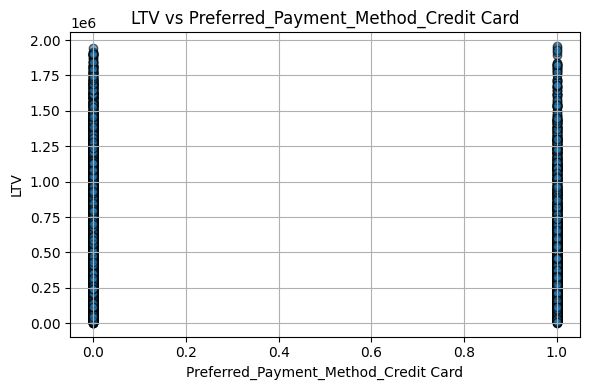

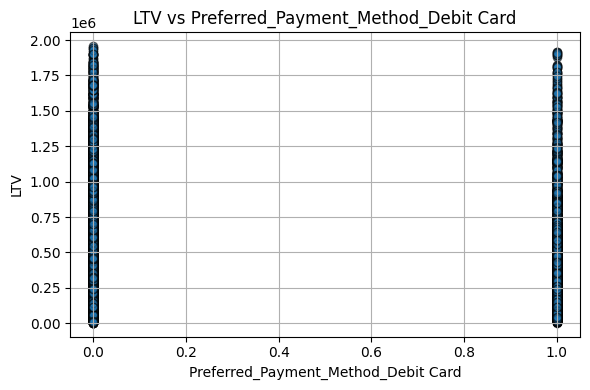

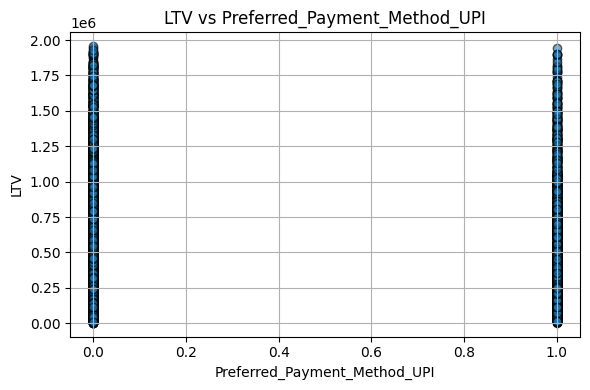

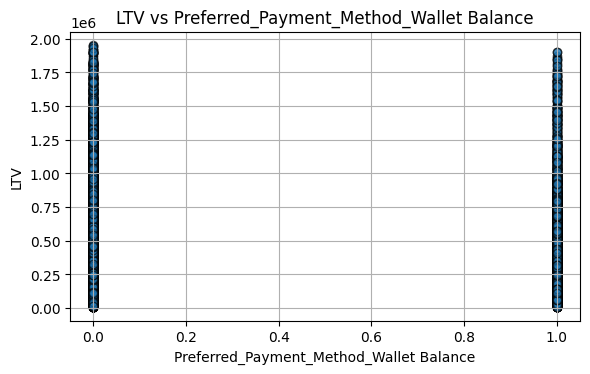

In [ ]:
# Iterate through each feature column and create a scatter plot with LTV
for feature in feature_columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df["LTV"], alpha=0.6, edgecolors='k')
    plt.xlabel(feature)
    plt.ylabel("LTV")
    plt.title(f"LTV vs {feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
